# NLP - Sentiment Analysis for Amazon Product Reviews
# Pre-trained Model: TextBlob Python Library

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Libraries for Text Blob approach
from nltk.corpus import stopwords
from textblob import TextBlob

# To set gray background at graphs
plt.style.use('ggplot')

In [2]:
# Read scraped results from CSV
df = pd.read_csv('Whey_Protein_Amazon_Preprocessed_Reviews.csv')

In [3]:
# Change data type for 'Review' to 'string' & fill empty cells (from CSV) with NA
df['Reviews'] = df['Reviews'].astype('string')
df = df.fillna('NA')
# Drop extra unnamed column
#col_0 = df.columns[0]
#df.drop(col_0, axis = 1, inplace = True)

In [5]:
print(df.dtypes)

ID                int64
Product_Name     object
Date             object
Rating_Score    float64
Reviews          string
Link             object
Product_ID       object
dtype: object


## TextBlob Approach

The output of TextBlob is polarity and subjectivity. Polarity score lies between (-1 to 1) where -1 identifies negative words (such as ‘bad’, ‘awful’, ‘pathetic’, etc) and 1 identifies positive words (like ‘excellent’, ‘best’, etc.). Subjectivity score lies between (0 and 1), and it shows the amount of personal opinion. 
If a sentence has high subjectivity i.e. close to 1, it resembles that the text contains more personal opinion than factual information. 

In [7]:
# We loop through the reviews and append polarity & subjectivity to empty list, which will get concatenated to the 
# dataframe
textblob_polarity_score = []
textblob_subjectivity_score = []
for i in range(0, df.shape[0]):
    score = TextBlob(df.iloc[i][4])
    textblob_polarity_score.append(score.polarity)
    textblob_subjectivity_score.append(score.subjectivity)

In [8]:
df = pd.concat([df, pd.Series(textblob_polarity_score)], axis = 1)

In [9]:
df.rename(columns = {0: 'textblob_polarity'}, inplace = True)

In [10]:
df = pd.concat([df, pd.Series(textblob_subjectivity_score)], axis = 1)

In [12]:
df.rename(columns = {0: 'textblob_subjectivity'}, inplace = True)

In [13]:
# Create function for calculating positive, negative and neutral
# More than 1 is 'Positive', equal to 0 is 'neutral' and less than 0 is 'Negative'
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
    
df['textblob_analysis'] = df['textblob_polarity'].apply(ratio)

In [14]:
df = df[['ID', 'Product_Name', 'Date', 'Rating_Score', 'textblob_polarity', 'textblob_subjectivity', 'textblob_analysis', 'Reviews', 'Product_ID']]

In [15]:
df.head()

,ID,Product_Name,Date,Rating_Score,textblob_polarity,textblob_subjectivity,textblob_analysis,Reviews,Product_ID
0,0,NatureWorks-HydroMATE-Electrolytes-Chocolate-C...,2023-01-25,5.0,0.456250,0.628125,1,I love this. I make it for myself and my kids...,B0BRT77ZK8
1,1,NatureWorks-HydroMATE-Electrolytes-Chocolate-C...,2023-02-06,5.0,0.000000,0.400000,0,Takes away lightheadedness and makes my husba...,B0BRT77ZK8
2,2,NatureWorks-HydroMATE-Electrolytes-Chocolate-C...,2023-01-27,5.0,0.500000,0.750000,1,The chocolate tastes delicious! I drink it ev...,B0BRT77ZK8
3,3,NatureWorks-HydroMATE-Electrolytes-Chocolate-C...,2023-01-27,5.0,0.406250,0.575000,1,I absolutely love this! My buddy gave me a fe...,B0BRT77ZK8
4,4,NatureWorks-HydroMATE-Electrolytes-Chocolate-C...,2023-02-18,4.0,0.171118,0.582585,1,I like to work out regularly. This includes w...,B0BRT77ZK8


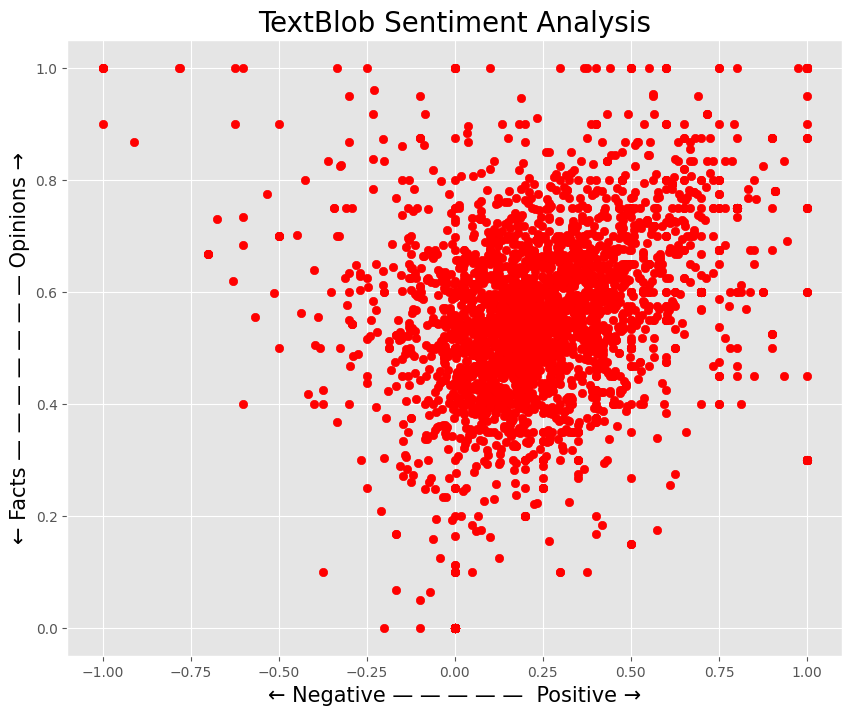

In [19]:
# Set up visualization
plt.rcParams['figure.figsize'] = [10, 8]
for index, Reviews in enumerate(df.index):
    x = df.textblob_polarity.loc[Reviews]
    y = df.textblob_subjectivity.loc[Reviews]
    plt.scatter(x, y, color ='Red') 
plt.title('TextBlob Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — —  Positive →', fontsize = 15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize = 15)
plt.show()

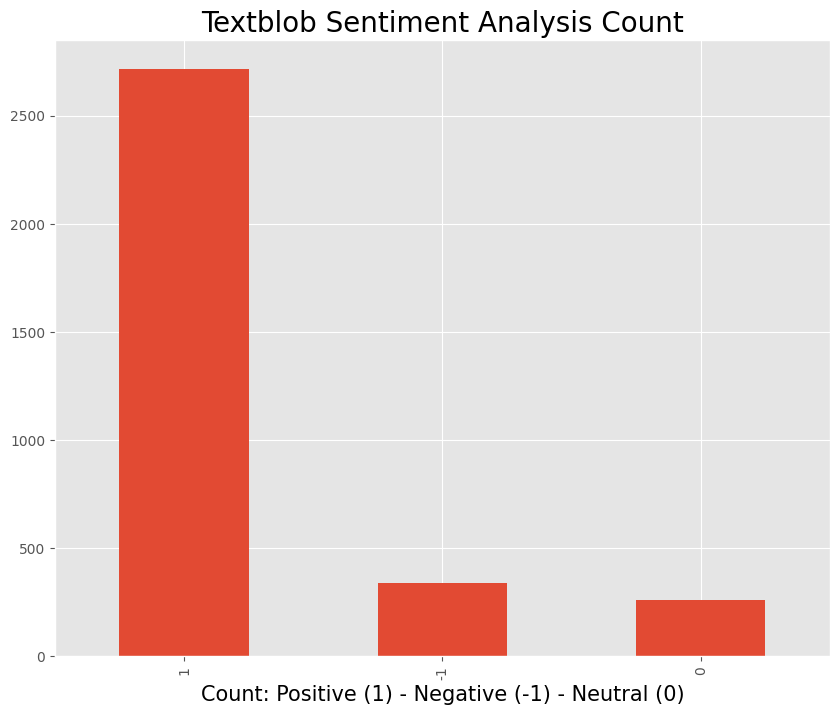

textblob_analysis
-1     339
 0     261
 1    2714
dtype: int64


In [24]:
# Set up visualization
df['textblob_analysis'].value_counts().plot(kind = 'bar')
plt.title('Textblob Sentiment Analysis Count', fontsize = 20)
plt.xlabel('Count: Positive (1) - Negative (-1) - Neutral (0)', fontsize=15)
plt.show()

textblob_counts = df.groupby(['textblob_analysis']).size()
print(textblob_counts)

## Conclusion: As expected, Textblob results are biased towards positive comments/sentiments about whey protein products as well. However, most results or predictions from the sentiment scatterplot scored higher in subjectivity (meaning that most reviews are mostly opinion-based)

In [22]:
df.to_csv('Whey_Protein_Textblob_Results.csv') 